# Videos and Exercises for Session 4: Python Plotting
As mentioned during the lecture, the Python ecosystem has a number of fantastic packages that can do various different plots. We will work mainly with two packages in this course. The first is the classic tool, `matplotlib`, which was an adaptation in the plotting tools from matplotlib (if you don't already have matplotlib installed, run `pip install matplotlib`). The second tool is `seaborn` which is newer module that allows to produce figures with less effort, similar to `ggplot2` in `R`.

In this combined teaching module and exercise, we will work with visualizations in python using these two powerful plotting libraries. We will also quickly touch upon using pandas for exploratory plotting. The structure is as follows:
1. The Layered Grammar of Graphics
2. Plotting One Variable (Exploratory Plotting)
3. Plotting Multiple Variables
    - Plotting Two Numeric Variables
    - Plotting Mixed Variables (Numeric and Categorical)
    - Exercises with the Data from Seaborn
4. Final Pieces of Advice on Plotting

## Loading
 
We will work with the three datasets `iris`, `tips` and `titanic`, all of which you will be loading (through the seaborn library!) using the code below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

%matplotlib inline 

iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
#titanic=titanic.dropna()

Below we inspect the contents of `tips`:

In [3]:
print('Number of rows:',len(tips),'\n')
print(tips.head(7))

Number of rows: 244 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2


# Part 1: The Layered Grammar of Graphics

To understand how we actually build that type of figure, we will follow the *layered grammar of graphics*. We go from an empty canvas and fill it up by adding and removing elements.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2yhDLn4Z6pI', width=640, height=360)

We start out with introducing some of the most fundamental plots, the histogram. This plot is particularly useful when we want to plot data in one dimension. To understand how, we do that we should know the math behind it.

Recall that we have learned about the method called `value_counts` for counting discrete data in Python. In the warm-up exercise below, we want you to count the number of instance of the `total bill` variable in discrete bins in order to get an early idea of the distribution of bills in our data.

> **Ex. 4.1.1:** Use the *cut*-method that was used in the last two sessions in order to count the number of instance that the `total_bill` have in discrete bins split by 10\\$ apart (from 0\\$ to 70\\$). Present your data in two pandas Series: One where you count the instances in each bin, and one where you present the counts in relative terms (i.e. divide through by the total number of observations). Remember to sort by the index value.
>
> *Hint:* Note that this is not a plotting exercise, but simply an exercise where we practice turning the numeric data into categorical/discrete data in order to count it.





>

In [4]:
cuts = np.arange(0,80, 10) # range from -10 to 10 with intervals of unit size
cats = pd.cut(tips['total_bill'], cuts)
cats.value_counts()/tips['total_bill'].count()

(10, 20]    0.532787
(20, 30]    0.266393
(30, 40]    0.090164
(0, 10]     0.069672
(40, 50]    0.036885
(50, 60]    0.004098
(60, 70]    0.000000
Name: total_bill, dtype: float64

Once we have counted the data, we can make a histogram that shows the counts for different bins, which are made from splitting the data as we did above. The code below produces a histogram which we have customized ourselves using `matplotlib`.

*Note:* Before, we chose a bin size of 10 \\$. In the plot below, the plot automatically determines the width of the bins.

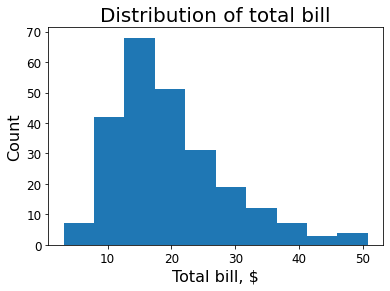

In [5]:
f,ax = plt.subplots()

ax.hist( tips['total_bill']) # Choose histogram

ax.set_title('Distribution of total bill') # Choose title for plot
ax.title.set_fontsize(20) # Choose title font size

ax.set_xlabel('Total bill, $') # Choose title x-axis
ax.xaxis.label.set_fontsize(16) # Choose font size for a-axis title

ax.set_ylabel('Count') # Choose title y-axis
ax.yaxis.label.set_fontsize(16) # Choose font size for y-axis title
    
for item in ax.get_yticklabels()+ax.get_xticklabels():
    item.set_fontsize(12) # Choose size of ticks

> **Ex. 4.1.2:** Plot histograms for `total_bill` and `tips` side by side. Use the code below to generate same amount of bins in the two plots. Make only one title for the y-axis (`.set_ylabel()`), and make individual titles for the x-axes (`.set_xlabel()`). Choose appropriate font sizes (e.g. `.xaxis.label.set_fontsize()`) and specify a joint title with `.suptitle()` (documentation [here](https://matplotlib.org/2.0.2/api/pyplot_api.html)). Try and change `plt.style.use()` to something else than *default*.
>
> *Hint*: In order to specify features of each of the two subplots, you can find inspiration in the code above. However, in order to refer to each subplot, you know have to refer to `ax[0]` and `ax[1]` instead of `ax`.

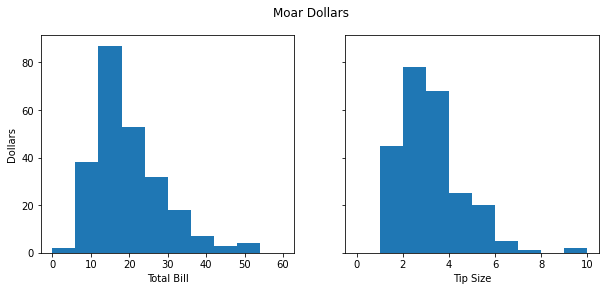

In [11]:
f, ax = plt.subplots(1,2, sharey=True, figsize=(10,4)) # Explain what each element does!

bins_tip = np.arange(11)
bins_tb = np.arange(11)*6

ax[0].hist( tips['total_bill'], bins=bins_tb)
ax[1].hist( tips['tip'], bins=bins_tip)

ax[0].set_ylabel('Dollars')
ax[0].set_xlabel('Total Bill')
ax[1].set_xlabel('Tip Size')
f.suptitle('Moar Dollars')
# f.title.set_fontsize(20)#
plt.style.use('ggplot')


# YOUR CODE HERE
#raise NotImplementedError()

In [18]:
tips.total_bill.max()

50.81

# Part 2: Plotting One Variable (Exploratory Plotting)

Often, we are only interested in a figure to get brief glimpse of the content, e.g. if you just want to check something yourself. In this case, because your audience is limited you should choose something that is good enough with little effort. The fastest is to plot directly with `pandas` as it have methods built-in. However, this is often cumbersome and does not produce great results. Therefore, we recommend using `seaborn` which we will focus on in the remainder of this module.

In the video below, we will see how we can make a smoothed distribution plot using a kernel. These approximate the frequency by interpolate the count of observations within some bandwith. We will use `seaborn` to make the plot but modify it using `matplotlib`. We also show how to think about plotting, when you only have one categorical variable.

In [ ]:
YouTubeVideo('gyCCb4VYiOs', width=640, height=360)

> **Ex. 4.2.1:** Plot histograms for both the density and the cumulative density of `tips` side by side using the code below and filling in the middle area. Make sure to plot both histograms and the smoothed densities and remember labels for each y-axis. Use `.despine()` to make your plot nicer to look at.
>
> *Hint:* In order to make two subplots, notice that `distplot` takes `ax` as an argument the following way: `sns.distplot([code], ax=ax[i])`. You can also see [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

Text(0.5, 0.98, 'Tips ($)')

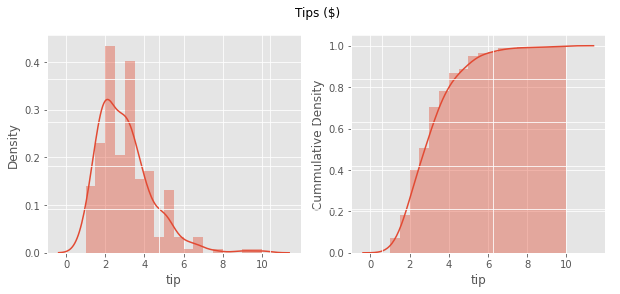

In [19]:
import warnings
warnings.filterwarnings("ignore")
f,ax = plt.subplots(1,2, sharex=True, figsize=(10,4))
kwargs = {'cumulative': True}
sns.distplot(tips['tip'], label='Tips', ax= ax[0])
sns.distplot(tips['tip'], label='Tips', ax= ax[1], hist_kws=kwargs, kde_kws=kwargs)
sns.despine()
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Cummulative Density')
# raise NotImplementedError()

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.suptitle("Tips ($)")

# Part 3: Plotting Multiple Variables


## Plotting Two Numeric Variables

With numeric data, we can plot the relationship between two variables. 

A common way of plotting this relationship is showing the raw data with point cloud, which is known as a `scatterplot`. This is an effective plot when our dataset is small (e.g. <1000). It can also be used for larger datasets, but then it is a good idea to color by degree of overlap (use the `alpha` keyword). We can also interpolate points in the data, which is what the KDE plot does when we apply it in a two-dimensional context.

In the video below, we cover some of these methods.

In [ ]:
YouTubeVideo('y4voCN06F4Y', width=640, height=360)

## Plotting Mixed Variables (Numeric and Categorical)

When we want to plot multiple variables where at least one is categorical, we can often make multiple plots for each category and combine them in one figure with, say, a color capturing each category. 

In simple cases, we have one numeric variable and one categorical variable. In this case, we can actually still sometimes represent the data in some type of a scatter plot. However, often it may provide more information to represent the data with bars, 'violins' or boxplots. In more advanced cases, we have two numeric variables and one categorical variable. In these cases, we can create, say, a scatter between the two numeric variables and again use colors to represent a 'third dimension' in the plot.

Finally, we might also be in a situation where we just have a lot of variables at hand, and we want to get an idea about how these are interrelated. In such a situation, we may simply need to plot all combinations of pairs of variables against each other. These plots, however, rarely do well when presented to a large audience, but they may help you get an idea about where the interesting correlations in the data lie (i.e. exploratory plotting).

The video below covers these approaches.

In [ ]:
YouTubeVideo('ug_8av1rG9Y', width=640, height=360)

In this series of exercises, we want you to try and work with the tools that have been introduced in the videos. Furthermore, we will also ask you to do minor adjustments that have not already been shown in the videos. Try and use Google to find the answers to your questions - this is a tool that is important to become very familiar with.

The first exercise uses the *tips* data and is there to get you started.

> **Ex. 4.3.1:** The example below shows two plots. The left shows a bar for each day of the week with data. The right shows a box and whiskers plot, which is split by gender/sex. To get started, simply try and alter the code for the left figure and insert the keyword `hue='sex'`. What happens? Also try to change the right figure from `boxplot` to `violinplot`. Explain what the violinplot shows. If you are in doubt, read about violinplots [here](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d?gi=e7601874575d).

<AxesSubplot:xlabel='sex', ylabel='tip'>

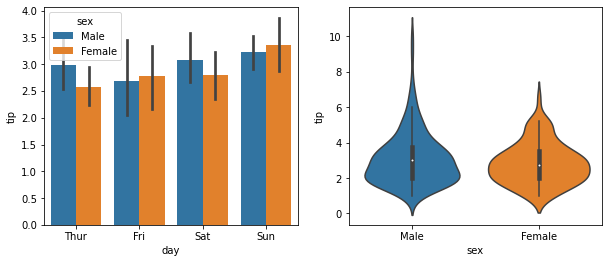

In [3]:
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='day', y='tip', data=tips, ax=ax[0], hue='sex')
sns.violinplot(x='sex', y='tip', data=tips, ax=ax[1])

In the next set of plotting exercises, we will turn our attention to the *titanic* dataset. We will create a simple figure from the bottom using the [_grammar of graphics_](http://vita.had.co.nz/papers/layered-grammar.pdf) framework that plots the distribution of passenger age (numeric variable) for different passenger classes (categorical variable).

<br>

***NOTE:*** Because of the way the jupyter notebooks are made, you will have to complete this exercise in a single code cell. 

> **Ex. 4.3.2:** Create an empty coordinate system with the *x* axis spanning from 0 to 100 and the *y* axis spanning 0 to 0.05.

> **Ex. 4.3.3:** Add three KDE-curves with `seaborn` to the existing axis (get more information about `kdeplot` [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)). The KDEs should estimate the density of passenger age within each passenger class. Add a figure title and axis labels. Make sure the legend entries makes sense. *If* you have time, change the colors. _Hint:_ a `for` loop might be useful here.

> **Ex. 4.3.4:** Saving plots with matplotlib can be done with the `plt.savefig('file_name.file_format')` method. The supported file formats are `['ps','eps','pdf','pgf','png','raw',rgba','svg','svgz','jpg','jpeg','tif','tiff']`. Choose your preferred file format and save your plot with the filename `ex_334_plot`.

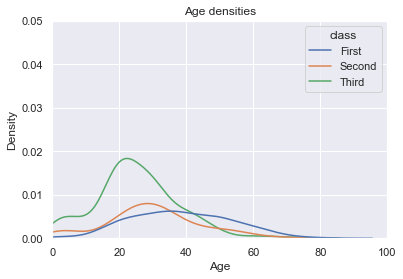

In [75]:

import warnings
warnings.filterwarnings("ignore")

fig = sns.kdeplot(data=titanic, x="age", hue="class", legend=True)
plt.title('Age densities')
fig.set_xlabel('Age')
fig.set_ylim(0, 0.05)
fig.set_xlim(0, 100)


plt.savefig('ex_334_plot.png')



> **Ex. 4.3.5:**: This exercise consists of a set of small subelements: 
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Combine the two of the figures you created above into a two-panel figure similar to the one shown here and save the figure as a png file on your computer. :
> <img src="Example2.png" alt="Drawing" style="width: 600px;"/>
>
>  _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


<AxesSubplot:xlabel='class', ylabel='fare'>

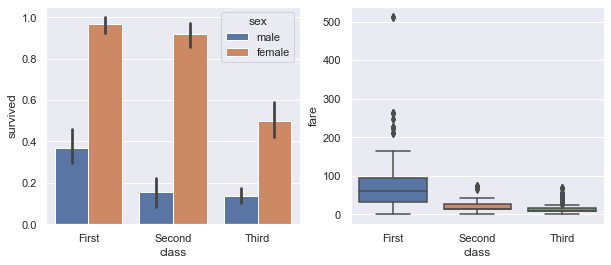

In [5]:
sns.set()
# sns.countplot('class',hue='sex',data=titanic.query('survived == 1'))
# INCLUDED IN ASSIGNMENT 1
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='class', y='survived',hue='sex',data=titanic, ax=ax[0])
sns.boxplot(x='class', y='fare', data=titanic, ax=ax[1])

342

We move on to the *iris* data that we now want you to explore with a scatter plot. The goal with the plot that you produce in this part of the exercises is to give yourself and your group members an improved understanding of the dataset. Thus, here we want to be able to quickly inspect the data, rather than having a polished, explanatory figure.

> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

In [ ]:
# INCLUDED IN ASSIGNMENT 1

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

As seen in the last part of the video, sometimes we just want a quick and dirty overview of our dataset. One way is to plot the the pairwise relationships between all variables, which is possible using the pairplot. 

In the example below we see how this plot quickly provides us within an overview of the association between the variables `tip`, `total_bill` and `size`. Note that we can the kind of plot it uses, e.g. KDE also for the two-way plot.

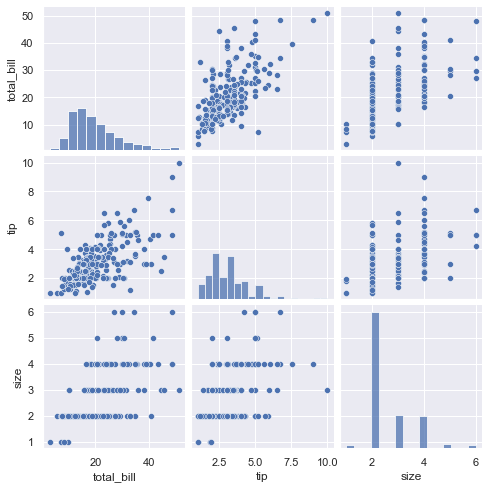

In [6]:
sns.pairplot(tips, height=2.3) # make hist and scatter for all

> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

In [ ]:
# INCLUDED IN ASSIGNMENT 1

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

The following exercises are optional! They highlight some of the advanced uses of matplotlib and seaborn. These techniques allow you to create customized plots with a lot of versatility. Therefore, these are **_BONUS_** questions.
<br>

***NOTE:*** Because of the way the jupyter notebooks are made, you will have to complete this exercise in a single code cell. 

> **Ex. 4.3.8:** *(Bonus)*  Reuse your code from exercises 3.3.2 to 3.3.4, where you used the titanic data and plotted the distribution of passenger ages by the passenger class. Now, add a new subplot that sits within the outer one. Use `[0.55, 0.6, 0.3, 0.2]` the subplots size. At this point your figure should look something like this: 
>
> <img src="exampleq4.png" alt="Drawing" style="width: 400px;"/>
>
>> _Hint:_ This [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) has some tips for plotting subplots.

<br><br>
> **Ex. 4.3.9:** *(Bonus)* Move the legend outside the graph window, and add a barplot of survival probabilities split by class to the small subplot. The barplot is introduced below. 
>
>> _Hint:_ [Look here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) for examples of how to move the legend box around.
>
> In the end, your figure should look similar to this one:
> <img src="final5.png" alt="Drawing" style="width: 400px;"/>


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Part 4: Final Pieces of Advice on Plotting
You might be wondering - what are some tips for making **explanatory** plots in a report?  **<font color="red">(Exam relevant!)</font>**

1. Clear narratives - should convey key point(s)
  - If you to show difference between groups in data make sure it is easy to distinguish them.

1. Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).
  
1. Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.
  
1. Nice appereance 
  - Choose the right plot type.
  - Make sure font type, size, colors, line width.
  